In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pyproj import Proj, transform
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linreg
from sklearn.metrics import accuracy_score
import seaborn as sns
import datetime
import ast
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
rent_studio = pd.read_csv('csv/Zip_MedianRentalPrice_Studio.csv')
zip_code_list = pd.read_csv('csv/zipcode_by_neighborhood.csv', index_col = 0)

In [3]:
zip_code_list['zipcodes'] = zip_code_list['zipcodes'].apply(lambda x: ast.literal_eval(x)) 

In [4]:
zip_code_all_list = [zipcodes[i] for zipcodes in zip_code_list.zipcodes for i in range(0,len(zipcodes))]
# zip_code_all_list

In [5]:
neighborhoods = []
zipcodes = []
for i in range(0, len(zip_code_list)):
    for j in range(0, len(zip_code_list.iloc[i].zipcodes)):
        neighborhoods.append(zip_code_list.neighborhood[i])
        zipcodes.append(int(zip_code_list.zipcodes[i][j]))

In [6]:
zipcode_neighborhood = {'neighborhood': neighborhoods, "zipcodes": zipcodes}

In [7]:
zipcode_neighborhood_df = pd.DataFrame(zipcode_neighborhood)

In [8]:
gentrification_flag = pd.read_csv('rent_studio_w_gentrification_flag.csv', index_col = 0)
gentrification_label_by_zip = dict(zip(gentrification_flag['RegionName'], gentrification_flag['gentrification_label']))
zipcode_neighborhood_df['gentrification_label'] = zipcode_neighborhood_df["zipcodes"].map(gentrification_label_by_zip)

In [10]:
zipcode_neighborhood_df['gentrification_label'][zipcode_neighborhood_df['zipcodes'] == 11105] = ['Gentrifying']
zipcode_neighborhood_df['gentrification_label'][zipcode_neighborhood_df['zipcodes'] == 11105]

130    Gentrifying
Name: gentrification_label, dtype: object

In [11]:
zipcode_neighborhood_df['gentrification_label'][zipcode_neighborhood_df['neighborhood'] == "Port Richmond"] = ["Higher-Income","Higher-Income","Higher-Income"]
zipcode_neighborhood_df['gentrification_label'][zipcode_neighborhood_df['neighborhood'] == "South Shore"]

169    NaN
170    NaN
171    NaN
172    NaN
173    NaN
Name: gentrification_label, dtype: object

In [15]:
set(zipcode_neighborhood_df['gentrification_label'])

{'Gentrifying', 'Higher-Income', 'Non-Gentrifying', nan}

In [ ]:
zipcode_neighborhood_df['gentrification_label'][zipcode_neighborhood_df['gentrification_label'].isnull()]  = ['Higher-Income','Higher-Income','Higher-Income','Higher-Income','Higher-Income','Higher-Income','Higher-Income','Higher-Income','Higher-Income']

In [140]:
zipcode_neighborhood_df['gentrification_label'][zipcode_neighborhood_df['zipcodes'] == 11421] = ['Higher-Income']


In [146]:
zipcode_neighborhood_df['gentrification_label'][zipcode_neighborhood_df['neighborhood'] == 'South Shore'] 

169    NaN
170    NaN
171    NaN
172    NaN
173    NaN
Name: gentrification_label, dtype: object

In [150]:
zipcode_neighborhood_df['gentrification_label'][zipcode_neighborhood_df['neighborhood'] == 'Mid-Island'] = ['Higher-Income']

In [152]:
rent_studio_nys = rent_studio[rent_studio.State == 'NY']

In [153]:
rent_studio_nys = rent_studio_nys.reset_index(drop = True)

In [154]:
rent_studio_nyc = rent_studio_nys[(rent_studio_nys['CountyName'] == 'Bronx')|(rent_studio_nys['CountyName'] == 'Kings')|(rent_studio_nys['CountyName'] == 'New York')|(rent_studio_nys['CountyName'] == 'Queens')]

In [362]:
rent_studio_nyc_plot = rent_studio_nyc
rent_studio_nyc_plot.index = pd.to_datetime(rent_studio_nyc_plot.index)

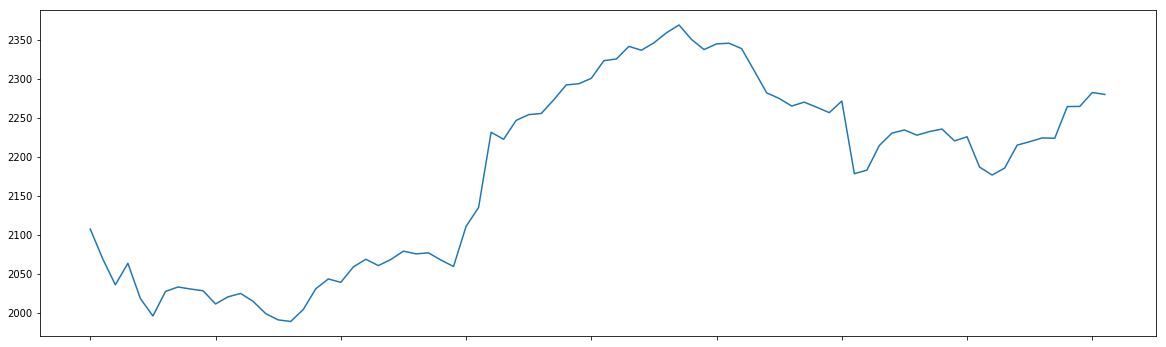

In [367]:
rent_studio_nyc_plot.loc[:,'2011-11':'2018-08'].mean(axis =0).plot(figsize = (20,6))
plt.show()

In [364]:
rent_studio_nyc['gentrification_label'] = np.nan

In [374]:
# williamsburg_df[(williamsburg_df.category == 'chinese')&(williamsburg_df.oldest_review >'2017-01')]

In [156]:
williamsburg_df = pd.read_csv('csv/yelp_williamsburg_w_review_date.csv', index_col = 0)
bushwick_df = pd.read_csv('csv/yelp_bushwick_w_review_date.csv', index_col = 0)
sunsetpark_df = pd.read_csv('csv/yelp_sunsetpark_w_review_date.csv', index_col = 0)
greenpoint_df = pd.read_csv('csv/yelp_greenpoint_w_review_date.csv', index_col = 0)
east_harlem_df = pd.read_csv('csv/yelp_east_harlem_w_review_date.csv', index_col = 0)
chelsea_clinton_df = pd.read_csv('csv/yelp_chelsea_clinton_w_review_date.csv', index_col = 0)
central_harlem_df = pd.read_csv('csv/yelp_centralharlem_w_review_date.csv', index_col = 0)
lower_manhattan_df = pd.read_csv('csv/yelp_lower_manhattan_w_review_date.csv', index_col = 0)
Northeast_Queens_df = pd.read_csv('csv/yelp_Northeast_Queens_cleaned.csv', index_col = 0)
Southeast_Bronx_df = pd.read_csv('csv/yelp_Southeast_Bronx_df_cleaned.csv', index_col = 0)
Flatbush_df = pd.read_csv("csv/yelp_Flatbush_df_cleaned.csv", index_col = 0)
EastNewYork_NewLots_df = pd.read_csv('csv/yelp_EastNewYork_NewLots_df_cleaned.csv', index_col = 0)
upper_west_side_df = pd.read_csv('csv/yelp_upper_west_side_df_cleaned.csv', index_col = 0)
upper_east_side_df = pd.read_csv('csv/yelp_upper_east_side_df_cleaned.csv', index_col = 0)
greenwichvill_soho_df = pd.read_csv('csv/yelp_greenwichvill_soho_df_cleaned.csv', index_col = 0)
jamaica_df = pd.read_csv('csv/yelp_jamaica_df_cleaned.csv', index_col = 0)
rockaways_df = pd.read_csv('csv/yelp_rockaways_cleaned.csv', index_col = 0)
gramacy_murray_hill_df = pd.read_csv('csv/yelp_gramacy_murray_hill_cleaned.csv', index_col = 0)
Inwood_WashingtonHeights_df = pd.read_csv('csv/yelp_Inwood_WashingtonHeights_cleaned.csv', index_col = 0)

In [246]:
southeastqueens_df = pd.read_csv('csv/yelp_southeastqueens_df_cleaned.csv', index_col = 0)
southwestqueens_df = pd.read_csv('csv/yelp_southwestqueens_df_cleaned.csv', index_col = 0)
southwestbrooklyn_df = pd.read_csv('csv/yelp_southwestbrooklyn_df_cleaned.csv', index_col = 0)
bronxcentral_df = pd.read_csv('csv/yelp_bronxcentral_df_cleaned.csv', index_col = 0)

In [174]:
# yelp_bushwick_categ = pd.read_csv('csv/yelp_bushwick.csv', index_col = 0)
# yelp_bushwick_categ.categories = yelp_bushwick_categ.categories.apply(lambda x: ast.literal_eval(x)) 

In [178]:
# # yelp_bushwick_categ = yelp_bushwick_categ.apply(lambda x: ast.literal_eval(x)) 
# yelp_bushwick_category = [yelp_bushwick_categ.categories[i][0]['alias'] for i in range(0, length_bushwick)]
# bushwick_df['category'] = yelp_bushwick_category
# williamsburg_id = list(set(williamsburg_df.id))

# yelp_bushwick_categ = yelp_bushwick_categ[~yelp_bushwick_categ['id'].isin(williamsburg_id)]
# yelp_bushwick_categ = yelp_bushwick_categ.reset_index(drop = True)
# yelp_bushwick_categ = yelp_bushwick_categ['categories']

In [248]:
length_williamsburg = len(williamsburg_df)
length_bushwick = len(bushwick_df)
length_sunsetpark = len(sunsetpark_df)
length_greenpoint = len(greenpoint_df)
length_east_harlem = len(east_harlem_df)
length_chelsea_clinton = len(chelsea_clinton_df)
length_central_harlem = len(central_harlem_df)
length_lower_manhattan = len(lower_manhattan_df)
length_gramacy_murray_hill = len(gramacy_murray_hill_df)
length_Inwood_WashingtonHeights = len(Inwood_WashingtonHeights_df)
length_Northeast_Queens = len(Northeast_Queens_df)
length_Southeast_Bronx = len(Southeast_Bronx_df)
length_Flatbush = len(Flatbush_df)
length_EastNewYork_NewLots = len(EastNewYork_NewLots_df)
length_upper_west_side = len(upper_west_side_df)
length_upper_east_side = len(upper_east_side_df)
length_greenwichvill_soho = len(greenwichvill_soho_df)
length_rockaways = len(rockaways_df)
length_jamaica = len(jamaica_df)

In [249]:
length_southeastqueens = len(southeastqueens_df)
length_southwestqueens = len(southwestqueens_df)
length_southwestbrooklyn = len(southwestbrooklyn_df)
length_bronxcentral = len(bronxcentral_df)

In [569]:
williamsburg_df['price'] = [len(williamsburg_df['price'][i]) if ~williamsburg_df['price'].isnull()[i] else np.nan for i in range(0, length_williamsburg)]
bushwick_df['price'] = [len(bushwick_df['price'][i]) if ~bushwick_df['price'].isnull()[i] else np.nan for i in range(0, length_bushwick)]
sunsetpark_df['price'] = [len(sunsetpark_df['price'][i]) if ~sunsetpark_df['price'].isnull()[i] else np.nan for i in range(0, length_sunsetpark)]
greenpoint_df['price'] = [len(greenpoint_df['price'][i]) if ~greenpoint_df['price'].isnull()[i] else np.nan for i in range(0, length_greenpoint)]
east_harlem_df['price'] = [len(east_harlem_df['price'][i]) if ~east_harlem_df['price'].isnull()[i] else np.nan for i in range(0, length_east_harlem)]
chelsea_clinton_df['price'] = [len(chelsea_clinton_df['price'][i]) if ~chelsea_clinton_df['price'].isnull()[i] else np.nan for i in range(0, length_chelsea_clinton)]
central_harlem_df['price'] = [len(central_harlem_df['price'][i]) if ~central_harlem_df['price'].isnull()[i] else np.nan for i in range(0, length_central_harlem)]
lower_manhattan_df['price'] = [len(lower_manhattan_df['price'][i]) if ~lower_manhattan_df['price'].isnull()[i] else np.nan for i in range(0, length_lower_manhattan)]
gramacy_murray_hill_df['price'] = [len(gramacy_murray_hill_df['price'][i]) if ~gramacy_murray_hill_df['price'].isnull()[i] else np.nan for i in range(0, length_gramacy_murray_hill)]

Inwood_WashingtonHeights_df['price'] = [len(Inwood_WashingtonHeights_df['price'][i]) if ~Inwood_WashingtonHeights_df['price'].isnull()[i] else np.nan for i in range(0, length_Inwood_WashingtonHeights)]
Northeast_Queens_df['price'] = [len(Northeast_Queens_df['price'][i]) if ~Northeast_Queens_df['price'].isnull()[i] else np.nan for i in range(0, length_Northeast_Queens)]
Southeast_Bronx_df['price'] = [len(Southeast_Bronx_df['price'][i]) if ~Southeast_Bronx_df['price'].isnull()[i] else np.nan for i in range(0, length_Southeast_Bronx)]
Flatbush_df['price'] = [len(Flatbush_df['price'][i]) if ~Flatbush_df['price'].isnull()[i] else np.nan for i in range(0, length_Flatbush)]
EastNewYork_NewLots_df['price'] = [len(EastNewYork_NewLots_df['price'][i]) if ~EastNewYork_NewLots_df['price'].isnull()[i] else np.nan for i in range(0, length_EastNewYork_NewLots)]
upper_west_side_df['price'] = [len(upper_west_side_df['price'][i]) if ~upper_west_side_df['price'].isnull()[i] else np.nan for i in range(0, length_upper_west_side)]
upper_east_side_df['price'] = [len(upper_east_side_df['price'][i]) if ~upper_east_side_df['price'].isnull()[i] else np.nan for i in range(0, length_upper_east_side)]
greenwichvill_soho_df['price'] = [len(greenwichvill_soho_df['price'][i]) if ~greenwichvill_soho_df['price'].isnull()[i] else np.nan for i in range(0, length_greenwichvill_soho)]
jamaica_df['price'] = [len(jamaica_df['price'][i]) if ~jamaica_df['price'].isnull()[i] else np.nan for i in range(0, length_jamaica)]
rockaways_df['price'] = [len(rockaways_df['price'][i]) if ~rockaways_df['price'].isnull()[i] else np.nan for i in range(0, length_rockaways)]

In [250]:
southeastqueens_df['price'] = [len(southeastqueens_df['price'][i]) if ~southeastqueens_df['price'].isnull()[i] else np.nan for i in range(0, length_southeastqueens)]
southwestqueens_df['price'] = [len(southwestqueens_df['price'][i]) if ~southwestqueens_df['price'].isnull()[i] else np.nan for i in range(0, length_southwestqueens)]
southwestbrooklyn_df['price'] = [len(southwestbrooklyn_df['price'][i]) if ~southwestbrooklyn_df['price'].isnull()[i] else np.nan for i in range(0, length_southwestbrooklyn)]
bronxcentral_df['price'] = [len(bronxcentral_df['price'][i]) if ~bronxcentral_df['price'].isnull()[i] else np.nan for i in range(0, length_bronxcentral)]

In [458]:
# williamsburg_df = williamsburg_df.drop([722])

In [459]:
# [williamsburg_df[i] for i in range(0,length_williamsburg) if len(williamsburg_df.oldest_review[i]) ==2]

#### Create a new dataframe for decision tree regression

In [549]:
def df_cleaning(df):
    df['oldest_review'] = pd.to_datetime(df['oldest_review'])
    one_hot_df = pd.get_dummies(df, columns=['category'])
    one_hot_df.index = one_hot_df['oldest_review']
    one_hot_df = one_hot_df.drop(['oldest_review'], axis = 1)
    one_hot_df_count = one_hot_df.groupby([pd.Grouper(freq = 'M'), "zipcode"]).sum()
    one_hot_df_avg = one_hot_df.groupby([pd.Grouper(freq = 'M'), "zipcode"]).mean()
    one_hot_df_count_selected = one_hot_df_count[['category_coffee', 'category_cafes', 'category_bars', 'category_newamerican']]
    one_hot_df_avg_selected = one_hot_df_avg[['price', 'rating']]
    one_hot_df_count_selected = one_hot_df_count_selected.reset_index(level=[0,1])
    one_hot_df_avg_selected = one_hot_df_avg_selected.reset_index(level=[0,1])
    one_hot_df_master = one_hot_df_count_selected.merge(one_hot_df_avg_selected, how = 'inner', on = ['oldest_review', 'zipcode'])
    return one_hot_df_master

In [481]:
williamsburg_df['oldest_review'] = pd.to_datetime(williamsburg_df['oldest_review'])
one_hot_williamsburg_df = pd.get_dummies(williamsburg_df, columns=['category'])
one_hot_williamsburg_df.index = one_hot_williamsburg_df['oldest_review']
one_hot_williamsburg_df.index = one_hot_williamsburg_df['oldest_review']
one_hot_williamsburg_df = one_hot_williamsburg_df.drop(['oldest_review'], axis = 1)

In [526]:
one_hot_williamsburg_df_count = one_hot_williamsburg_df.groupby([pd.Grouper(freq = 'M'), "zipcode"]).sum()
one_hot_williamsburg_df_avg = one_hot_williamsburg_df.groupby([pd.Grouper(freq = 'M'), "zipcode"]).mean()

In [529]:
one_hot_williamsburg_df_count_selected = one_hot_williamsburg_df_count[['category_coffee', 'category_cafes', 'category_bars', 'category_newamerican']]
one_hot_williamsburg_df_avg_price_rating = one_hot_williamsburg_df_avg[['price', 'rating']]

In [540]:
one_hot_williamsburg_df_count_selected = one_hot_williamsburg_df_count_selected.reset_index(level=[0,1])
one_hot_williamsburg_df_avg_price_rating = one_hot_williamsburg_df_avg_price_rating.reset_index(level=[0,1])

In [543]:
one_hot_williamsburg_df_master = one_hot_williamsburg_df_count_selected.merge(one_hot_williamsburg_df_avg_price_rating, how = 'inner', on = ['oldest_review', 'zipcode'])

In [618]:
chelsea_clinton_df = chelsea_clinton_df.drop([2590])
chelsea_clinton_df = chelsea_clinton_df.reset_index(drop=True)

In [624]:
# central_harlem_df = central_harlem_df.drop([760,761,762,763,764,765,766,767,768])

In [657]:
one_hot_sunsetpark_df_master = df_cleaning(sunsetpark_df)
one_hot_greenpoint_df_master = df_cleaning(greenpoint_df)
one_hot_east_harlem_df_master = df_cleaning(east_harlem_df)
one_hot_chelsea_clinton_df_master = df_cleaning(chelsea_clinton_df)
one_hot_central_harlem_df_master = df_cleaning(central_harlem_df)
one_hot_lower_manhattan_df_master = df_cleaning(lower_manhattan_df)

In [544]:
one_hot_williamsburg_df_master

,oldest_review,zipcode,category_coffee,category_cafes,category_bars,category_newamerican,price,rating
0,2005-04-30,10009.0,0,0,0,0,1.000000,4.000000
1,2005-04-30,11211.0,0,0,0,0,2.333333,4.000000
2,2005-04-30,11222.0,0,0,0,0,2.000000,3.500000
3,2005-04-30,11249.0,0,0,0,1,2.000000,4.000000
4,2005-05-31,10079.0,0,0,0,0,NaN,4.000000
5,2005-05-31,11211.0,0,1,1,0,1.533333,3.656250
6,2005-05-31,11222.0,0,0,0,0,2.000000,4.000000
7,2005-05-31,11249.0,0,0,1,0,2.000000,3.500000
8,2005-07-31,10009.0,0,0,0,0,2.000000,3.500000
9,2005-07-31,11211.0,1,0,0,0,1.000000,4.000000


In [485]:
# williamsburg_df_reviews_by_cat.groupby(level=[0,1]).sum()

In [194]:
# jamaica_df['price'] = [len(jamaica_df['price'][i]) if ~jamaica_df['price'].isnull()[i] else np.nan for i in range(0, length_jamaica)]
# rockaways_df['price'] = [len(rockaways_df['price'][i]) if ~rockaways_df['price'].isnull()[i] else np.nan for i in range(0, length_rockaways)]

In [195]:
### greenpoint ###
def category_count_by_zipcode(df):
    # create dictionary for mapping - cafe
    dict_coffee = dict(df[df['category'] == 'coffee'].groupby('zipcode').count()['alias'])
    dict_cafe = dict(df[df['category'] == 'cafes'].groupby('zipcode').count()['alias'])
    # convert to int from float
    dict_coffee = {int(key):value for key, value in dict_coffee.items()}
    dict_cafe = {int(key):value for key, value in dict_cafe.items()}
    # create dictionary for mapping - bars
    dict_bars = dict(df[df['category'] == 'bars'].groupby('zipcode').count()['alias'])
    # convert to int from float
    dict_bars = {int(key):value for key, value in dict_bars.items()}
    
    #avg rating
    dict_rating = df.groupby('zipcode').mean()['rating']
    dict_rating = {int(key):value for key, value in dict_rating.items()}
    
    #avg price
    dict_price = df.groupby('zipcode').mean()['price']
    dict_price = {int(key):value for key, value in dict_price.items()}
    
    # starbucks
    dict_starbucks = dict(df[df['alias'].str.contains('starbucks')].groupby('zipcode').count()['alias'])
    dict_starbucks  = {int(key):value for key, value in dict_starbucks.items()}
    
    return dict_coffee, dict_cafe, dict_bars, dict_rating, dict_price, dict_starbucks

In [196]:
dict_coffee_east_harlem, dict_cafe_east_harlem, dict_bars_east_harlem, dict_rating_east_harlem, dict_price_east_harlem, dict_starbucks_east_harlem = category_count_by_zipcode(east_harlem_df) 
dict_coffee_chelsea_clinton, dict_cafe_chelsea_clinton, dict_bars_chelsea_clinton, dict_rating_chelsea_clinton, dict_price_chelsea_clinton, dict_starbucks_chelsea_clinton = category_count_by_zipcode(chelsea_clinton_df) 
dict_coffee_central_harlem, dict_cafe_central_harlem, dict_bars_central_harlem, dict_rating_central_harlem, dict_price_central_harlem, dict_starbucks_central_harlem = category_count_by_zipcode(central_harlem_df) 
dict_coffee_Northeast_Queens, dict_cafe_Northeast_Queens, dict_bars_Northeast_Queens, dict_rating_Northeast_Queens, dict_price_Northeast_Queens, dict_starbucks_Northeast_Queens = category_count_by_zipcode(Northeast_Queens_df) 
dict_coffee_Southeast_Bronx, dict_cafe_Southeast_Bronx, dict_bars_Southeast_Bronx, dict_rating_Southeast_Bronx, dict_price_Southeast_Bronx, dict_starbucks_Southeast_Bronx = category_count_by_zipcode(Southeast_Bronx_df) 
dict_coffee_Flatbush, dict_cafe_Flatbush, dict_bars_Flatbush, dict_rating_Flatbush, dict_price_Flatbush, dict_starbucks_Flatbush = category_count_by_zipcode(Flatbush_df) 
dict_coffee_EastNewYork_NewLots, dict_cafe_EastNewYork_NewLots, dict_bars_EastNewYork_NewLots, dict_rating_EastNewYork_NewLots, dict_price_EastNewYork_NewLots, dict_starbucks_EastNewYork_NewLots = category_count_by_zipcode(EastNewYork_NewLots_df) 
dict_coffee_upper_west_side, dict_cafe_upper_west_side, dict_bars_upper_west_side, dict_rating_upper_west_side, dict_price_upper_west_side, dict_starbucks_upper_west_side = category_count_by_zipcode(upper_west_side_df) 
dict_coffee_jamaica, dict_cafe_jamaica, dict_bars_jamaica, dict_rating_jamaica, dict_price_jamaica, dict_starbucks_jamaica = category_count_by_zipcode(jamaica_df) 
dict_coffee_rockaways, dict_cafe_urockaways, dict_bars_rockaways, dict_rating_rockaways, dict_price_rockaways, dict_starbucks_rockaways = category_count_by_zipcode(rockaways_df) 
dict_coffee_lower_manhattan, dict_cafe_lower_manhattan, dict_bars_lower_manhattan, dict_rating_lower_manhattan, dict_price_lower_manhattan, dict_starbucks_lower_manhattan = category_count_by_zipcode(lower_manhattan_df) 
dict_coffee_gramacy_murray_hill, dict_cafe_gramacy_murray_hill, dict_bars_gramacy_murray_hill, dict_rating_gramacy_murray_hill, dict_price_gramacy_murray_hill, dict_starbucks_gramacy_murray_hill = category_count_by_zipcode(gramacy_murray_hill_df) 
dict_coffee_Inwood_WashingtonHeights, dict_cafe_Inwood_WashingtonHeights, dict_bars_Inwood_WashingtonHeights, dict_rating_Inwood_WashingtonHeights, dict_price_Inwood_WashingtonHeights, dict_starbucks_Inwood_WashingtonHeights = category_count_by_zipcode(Inwood_WashingtonHeights_df) 
dict_coffee_upper_east_side, dict_cafe_upper_east_side, dict_bars_upper_east_side, dict_rating_upper_east_side, dict_price_upper_east_side, dict_starbucks_upper_east_side = category_count_by_zipcode(upper_east_side_df) 
dict_coffee_greenwichvill_soho, dict_cafe_greenwichvill_soho, dict_bars_greenwichvill_soho, dict_rating_greenwichvill_soho, dict_price_greenwichvill_soho, dict_starbucks_greenwichvill_soho = category_count_by_zipcode(greenwichvill_soho_df) 

In [197]:
dict_coffee_jamaica, dict_cafe_jamaica, dict_bars_jamaica, dict_rating_jamaica, dict_price_jamaica, dict_starbucks_jamaica = category_count_by_zipcode(jamaica_df) 
dict_coffee_rockaways, dict_cafe_rockaways, dict_bars_rockaways, dict_rating_rockaways, dict_price_rockaways, dict_starbucks_rockaways = category_count_by_zipcode(rockaways_df) 

In [251]:
dict_coffee_southeastqueens, dict_cafe_southeastqueens, dict_bars_southeastqueens, dict_rating_southeastqueens, dict_price_southeastqueens, dict_starbucks_southeastqueens = category_count_by_zipcode(southeastqueens_df) 
dict_coffee_southwestqueens, dict_cafe_southwestqueens, dict_bars_southwestqueens, dict_rating_southwestqueens, dict_price_southwestqueens, dict_starbucks_southwestqueens = category_count_by_zipcode(southwestqueens_df) 
dict_coffee_southwestbrooklyn, dict_cafe_southwestbrooklyn, dict_bars_southwestbrooklyn, dict_rating_southwestbrooklyn, dict_price_southwestbrooklyn, dict_starbucks_southwestbrooklyn = category_count_by_zipcode(southwestbrooklyn_df) 
dict_coffee_bronxcentral, dict_cafe_bronxcentral, dict_bars_bronxcentral, dict_rating_bronxcentral, dict_price_bronxcentral, dict_starbucks_bronxcentral = category_count_by_zipcode(bronxcentral_df) 

In [200]:
lower_manhattan_df = lower_manhattan_df.drop([806, 1055])
lower_manhattan_df = lower_manhattan_df.reset_index(drop = True)

In [201]:
upper_east_side_df = upper_east_side_df.drop([1644, 740])
upper_east_side_df = upper_east_side_df.reset_index(drop = True)

In [204]:
# ### WILLIAMSBURG ### 
# # create dictionary for mapping - cafe
# dict_coffee_williamsburg = dict(williamsburg_df[williamsburg_df['category'] == 'coffee'].groupby('zipcode').count()['alias'])
# dict_cafe_williamsburg = dict(williamsburg_df[williamsburg_df['category'] == 'cafes'].groupby('zipcode').count()['alias'])
# # convert to int from float
# dict_coffee_williamsburg = {int(key):value for key, value in dict_coffee_williamsburg.items()}
# dict_cafe_williamsburg = {int(key):value for key, value in dict_cafe_williamsburg.items()}

# ### BUSHWICK ###
# # create dictionary for mapping - cafe
# dict_coffee_bushwick = dict(bushwick_df[bushwick_df['category'] == 'coffee'].groupby('zipcode').count()['alias'])
# dict_cafe_bushwick = dict(bushwick_df[bushwick_df['category'] == 'cafes'].groupby('zipcode').count()['alias'])
# # convert to int from float
# dict_coffee_bushwick = {int(key):value for key, value in dict_coffee_bushwick.items()}
# dict_cafe_bushwick = {int(key):value for key, value in dict_cafe_bushwick.items()}

# ### SUNSETPARK ###
# # create dictionary for mapping - cafe
# dict_coffee_sunsetpark = dict(sunsetpark_df[sunsetpark_df['category'] == 'coffee'].groupby('zipcode').count()['alias'])
# dict_cafe_sunsetpark = dict(sunsetpark_df[sunsetpark_df['category'] == 'cafes'].groupby('zipcode').count()['alias'])
# # convert to int from float
# dict_coffee_sunsetpark = {int(key):value for key, value in dict_coffee_sunsetpark.items()}
# dict_cafe_sunsetpark = {int(key):value for key, value in dict_cafe_sunsetpark.items()}

# ### greenpoint ###
# # create dictionary for mapping - cafe
# dict_coffee_greenpoint = dict(greenpoint_df[greenpoint_df['category'] == 'coffee'].groupby('zipcode').count()['alias'])
# dict_cafe_greenpoint = dict(greenpoint_df[greenpoint_df['category'] == 'cafes'].groupby('zipcode').count()['alias'])
# # convert to int from float
# dict_coffee_greenpoint = {int(key):value for key, value in dict_coffee_greenpoint.items()}
# dict_cafe_greenpoint = {int(key):value for key, value in dict_cafe_greenpoint.items()}

In [205]:
# ### WILLIAMSBURG ### 
# # create dictionary for mapping - cafe
# dict_bars_williamsburg = dict(williamsburg_df[williamsburg_df['category'] == 'bars'].groupby('zipcode').count()['alias'])
# # convert to int from float
# dict_bars_williamsburg = {int(key):value for key, value in dict_bars_williamsburg.items()}

# ### BUSHWICK ###
# # create dictionary for mapping - cafe
# dict_bars_bushwick = dict(bushwick_df[bushwick_df['category'] == 'bars'].groupby('zipcode').count()['alias'])
# # convert to int from float
# dict_bars_bushwick = {int(key):value for key, value in dict_bars_bushwick.items()}

# ### SUNSETPARK ###
# # create dictionary for mapping - cafe
# dict_bars_sunsetpark = dict(sunsetpark_df[sunsetpark_df['category'] == 'bars'].groupby('zipcode').count()['alias'])
# # convert to int from float
# dict_bars_sunsetpark = {int(key):value for key, value in dict_bars_sunsetpark.items()}

# ### greenpoint ###
# # create dictionary for mapping - cafe
# dict_bars_greenpoint = dict(greenpoint_df[greenpoint_df['category'] == 'bars'].groupby('zipcode').count()['alias'])
# # convert to int from float
# dict_bars_greenpoint = {int(key):value for key, value in dict_bars_greenpoint.items()}

In [206]:
# ### WILLIAMSBURG ### 
# # create dictionary for avg rating
# dict_rating_williamsburg = williamsburg_df.groupby('zipcode').mean()['rating']
# dict_rating_williamsburg = {int(key):value for key, value in dict_rating_williamsburg.items()}

# ### BUSHWICK ###
# # create dictionary for avg rating
# dict_rating_bushwick = bushwick_df.groupby('zipcode').mean()['rating']
# dict_rating_bushwick = {int(key):value for key, value in dict_rating_bushwick.items()}

# ### SUNSETPARK ###
# # create dictionary for avg rating
# dict_rating_sunsetpark = sunsetpark_df.groupby('zipcode').mean()['rating']
# dict_rating_sunsetpark = {int(key):value for key, value in dict_rating_sunsetpark.items()}

# ### greenpoint ###
# # create dictionary for avg rating
# dict_rating_greenpoint = greenpoint_df.groupby('zipcode').mean()['rating']
# dict_rating_greenpoint = {int(key):value for key, value in dict_rating_greenpoint.items()}

In [207]:
# ### WILLIAMSBURG ### 
# # create dictionary for avg price
# dict_price_williamsburg = williamsburg_df.groupby('zipcode').mean()['price']
# dict_price_williamsburg = {int(key):value for key, value in dict_price_williamsburg.items()}

# ### BUSHWICK ###
# # create dictionary for avg price
# dict_price_bushwick = bushwick_df.groupby('zipcode').mean()['price']
# dict_price_bushwick = {int(key):value for key, value in dict_price_bushwick.items()}

# ### SUNSETPARK ###
# # create dictionary for avg price
# dict_price_sunsetpark = sunsetpark_df.groupby('zipcode').mean()['price']
# dict_price_sunsetpark = {int(key):value for key, value in dict_price_sunsetpark.items()}

# ### greenpoint ###
# # create dictionary for avg price
# dict_price_greenpoint = greenpoint_df.groupby('zipcode').mean()['price']
# dict_price_greenpoint = {int(key):value for key, value in dict_price_greenpoint.items()}

In [208]:
# dict_starbucks_sunsetpark = dict(sunsetpark_df[sunsetpark_df['alias'].str.contains('starbucks')].groupby('zipcode').count()['alias'])
# dict_starbucks_sunsetpark  = {int(key):value for key, value in dict_starbucks_sunsetpark.items()}

# dict_starbucks_williamsburg = dict(williamsburg_df[williamsburg_df['alias'].str.contains('starbucks')].groupby('zipcode').count()['alias'])
# dict_starbucks_williamsburg  = {int(key):value for key, value in dict_starbucks_williamsburg.items()}

# dict_starbucks_bushwick = dict(bushwick_df[bushwick_df['alias'].str.contains('starbucks')].groupby('zipcode').count()['alias'])
# dict_starbucks_bushwick  = {int(key):value for key, value in dict_starbucks_bushwick.items()}

In [209]:
# dict_starbucks_greenpoint = dict(greenpoint_df[greenpoint_df['alias'].str.contains('starbucks')].groupby('zipcode').count()['alias'])
# dict_starbucks_greenpoint  = {int(key):value for key, value in dict_starbucks_greenpoint.items()}

In [252]:
dict_price = {k: [dict_price_williamsburg.get(k, 0)
              , dict_price_bushwick.get(k, 0) 
              ,  dict_price_sunsetpark.get(k, 0)
              ,  dict_price_greenpoint.get(k, 0)
              ,  dict_price_east_harlem.get(k, 0)
              ,  dict_price_chelsea_clinton.get(k, 0)
              ,  dict_price_central_harlem.get(k, 0)
              ,  dict_price_lower_manhattan.get(k, 0)
              ,  dict_price_gramacy_murray_hill.get(k, 0)
              ,  dict_price_Inwood_WashingtonHeights.get(k, 0)
              ,  dict_price_Northeast_Queens.get(k, 0)
              ,  dict_price_Southeast_Bronx.get(k, 0)
              ,  dict_price_Flatbush.get(k, 0)
              ,  dict_price_EastNewYork_NewLots.get(k, 0)
              ,  dict_price_upper_west_side.get(k, 0)
              ,  dict_price_upper_east_side.get(k, 0)
              ,  dict_price_greenwichvill_soho.get(k, 0)
              ,  dict_price_rockaways.get(k, 0)
              ,  dict_price_jamaica.get(k, 0)
              ,  dict_price_southeastqueens.get(k, 0)
              ,  dict_price_southwestbrooklyn.get(k, 0)
              ,  dict_price_southwestqueens.get(k, 0)
              ,  dict_price_bronxcentral.get(k, 0)
                 ]
              for k in set(list(set(dict_price_williamsburg)) 
                           + list(set(dict_price_bushwick))
                           + list(set(dict_price_sunsetpark))
                          + list(set(dict_price_greenpoint))
                           + list(set(dict_price_east_harlem))
                           + list(set(dict_price_chelsea_clinton))
                           + list(set(dict_price_central_harlem))
                           + list(set(dict_price_lower_manhattan))
                           + list(set(dict_price_gramacy_murray_hill))
                           + list(set(dict_price_Inwood_WashingtonHeights))
                           + list(set(dict_price_Northeast_Queens))
                           + list(set(dict_price_Southeast_Bronx))
                           + list(set(dict_price_Flatbush))
                           + list(set(dict_price_EastNewYork_NewLots))
                           + list(set(dict_price_upper_west_side))
                           + list(set(dict_price_upper_east_side))
                           + list(set(dict_price_greenwichvill_soho))
                           + list(set(dict_price_rockaways))
                           + list(set(dict_price_jamaica))
                           + list(set(dict_price_southeastqueens))
                           + list(set(dict_price_southwestbrooklyn))
                           + list(set(dict_price_southwestqueens))
                           + list(set(dict_price_bronxcentral))
                          )}

for key, value in dict_price.items():
    dict_price[key] = np.nanmean([np.NaN if i == 0 else i for i in value])

In [253]:
dict_rating = {k: [dict_rating_williamsburg.get(k, 0)
              , dict_rating_bushwick.get(k, 0) 
               , dict_rating_sunsetpark.get(k, 0) 
               , dict_rating_greenpoint.get(k, 0) 
               , dict_rating_east_harlem.get(k, 0) 
               , dict_rating_chelsea_clinton.get(k, 0)
               , dict_rating_central_harlem.get(k, 0)
               , dict_rating_lower_manhattan.get(k, 0)
               , dict_rating_gramacy_murray_hill.get(k, 0)
               , dict_rating_Inwood_WashingtonHeights.get(k, 0)
               , dict_rating_Northeast_Queens.get(k, 0)
               , dict_rating_Southeast_Bronx.get(k, 0)
               , dict_rating_Flatbush.get(k, 0)
               , dict_rating_EastNewYork_NewLots.get(k, 0)
               , dict_rating_upper_west_side.get(k, 0)
               , dict_rating_upper_east_side.get(k, 0)
               , dict_rating_greenwichvill_soho.get(k, 0)
               , dict_rating_rockaways.get(k, 0)
               , dict_rating_jamaica.get(k, 0)
               , dict_rating_southeastqueens.get(k, 0)
               , dict_rating_southwestbrooklyn.get(k, 0)
               , dict_rating_southwestqueens.get(k, 0)
               , dict_rating_bronxcentral.get(k, 0)
                  ]
              for k in set(list(set(dict_rating_williamsburg)) 
                           + list(set(dict_rating_bushwick))
                           + list(set(dict_rating_sunsetpark))
                           + list(set(dict_rating_greenpoint))
                           + list(set(dict_rating_east_harlem))
                           + list(set(dict_rating_chelsea_clinton))
                           + list(set(dict_rating_central_harlem))
                           + list(set(dict_rating_lower_manhattan))
                           + list(set(dict_rating_gramacy_murray_hill))
                           + list(set(dict_rating_Inwood_WashingtonHeights))
                           + list(set(dict_rating_Southeast_Bronx))
                           + list(set(dict_rating_Northeast_Queens))
                           + list(set(dict_rating_Flatbush))
                           + list(set(dict_rating_EastNewYork_NewLots))
                           + list(set(dict_rating_upper_west_side))
                           + list(set(dict_rating_upper_east_side))
                           + list(set(dict_rating_greenwichvill_soho))
                           + list(set(dict_rating_rockaways))
                           + list(set(dict_rating_jamaica))
                           + list(set(dict_rating_southeastqueens))
                           + list(set(dict_rating_southwestbrooklyn))
                           + list(set(dict_rating_southwestqueens))
                           + list(set(dict_rating_bronxcentral))
                          )}

for key, value in dict_rating.items():
    dict_rating[key] = np.nanmean([np.NaN if i == 0 else i for i in value])

In [254]:
dict_coffee = {k: dict_coffee_williamsburg.get(k, 0)
              + dict_coffee_bushwick.get(k, 0) 
               + dict_coffee_sunsetpark.get(k, 0) 
               + dict_coffee_greenpoint.get(k, 0) 
               + dict_coffee_east_harlem.get(k, 0) 
               + dict_coffee_chelsea_clinton.get(k, 0)
               + dict_coffee_central_harlem.get(k, 0)
               + dict_coffee_lower_manhattan.get(k, 0)
               + dict_coffee_gramacy_murray_hill.get(k, 0)
               + dict_coffee_Inwood_WashingtonHeights.get(k, 0)
               + dict_coffee_Southeast_Bronx.get(k, 0)
               + dict_coffee_Northeast_Queens.get(k, 0)
               + dict_coffee_Flatbush.get(k, 0)
               + dict_coffee_EastNewYork_NewLots.get(k, 0)
               + dict_coffee_upper_west_side.get(k, 0)
               + dict_coffee_upper_east_side.get(k, 0)
               + dict_coffee_greenwichvill_soho.get(k, 0)
               + dict_coffee_rockaways.get(k, 0)
               + dict_coffee_jamaica.get(k, 0)
               + dict_coffee_southeastqueens.get(k, 0)
               + dict_coffee_southwestbrooklyn.get(k, 0)
               + dict_coffee_southwestqueens.get(k, 0)
               + dict_coffee_bronxcentral.get(k, 0)
              for k in set(list(set(dict_coffee_williamsburg)) 
                           + list(set(dict_coffee_bushwick))
                           + list(set(dict_coffee_sunsetpark))
                           + list(set(dict_coffee_greenpoint))
                           + list(set(dict_coffee_east_harlem))
                           + list(set(dict_coffee_chelsea_clinton))
                           + list(set(dict_coffee_central_harlem))
                           + list(set(dict_coffee_lower_manhattan))
                           + list(set(dict_coffee_gramacy_murray_hill))
                           + list(set(dict_coffee_Inwood_WashingtonHeights))
                           + list(set(dict_coffee_Southeast_Bronx))
                           + list(set(dict_coffee_Northeast_Queens))
                           + list(set(dict_coffee_Flatbush))
                           + list(set(dict_coffee_EastNewYork_NewLots))
                           + list(set(dict_coffee_upper_west_side))
                           + list(set(dict_coffee_upper_east_side))
                           + list(set(dict_coffee_greenwichvill_soho))
                           + list(set(dict_coffee_rockaways))
                           + list(set(dict_coffee_jamaica))
                           + list(set(dict_coffee_southeastqueens))
                           + list(set(dict_coffee_southwestbrooklyn))
                           + list(set(dict_coffee_southwestqueens))
                           + list(set(dict_coffee_bronxcentral))
                          )}

In [255]:
dict_cafe = {k: dict_cafe_williamsburg.get(k, 0)
              + dict_cafe_bushwick.get(k, 0) 
               + dict_cafe_sunsetpark.get(k, 0)
             + dict_cafe_greenpoint.get(k, 0)
             + dict_cafe_east_harlem.get(k, 0)
             + dict_cafe_chelsea_clinton.get(k, 0)
             + dict_cafe_central_harlem.get(k, 0)
             + dict_cafe_lower_manhattan.get(k, 0)
             + dict_cafe_gramacy_murray_hill.get(k, 0)
             + dict_cafe_Inwood_WashingtonHeights.get(k, 0)
             + dict_cafe_Southeast_Bronx.get(k, 0)
             + dict_cafe_Northeast_Queens.get(k, 0)
             + dict_cafe_Flatbush.get(k, 0)
             + dict_cafe_EastNewYork_NewLots.get(k, 0)
             + dict_cafe_upper_west_side.get(k, 0)
             + dict_cafe_upper_east_side.get(k, 0)
             + dict_cafe_greenwichvill_soho.get(k, 0)
             + dict_cafe_rockaways.get(k, 0)
             + dict_cafe_jamaica.get(k, 0)
             + dict_cafe_southeastqueens.get(k, 0)
             + dict_cafe_southwestbrooklyn.get(k, 0)
             + dict_cafe_southwestqueens.get(k, 0)
             + dict_cafe_bronxcentral.get(k, 0)
              for k in set(list(set(dict_cafe_williamsburg)) 
                           + list(set(dict_cafe_bushwick))
                           + list(set(dict_cafe_sunsetpark))
                           + list(set(dict_cafe_greenpoint))
                           + list(set(dict_cafe_east_harlem))
                           + list(set(dict_cafe_chelsea_clinton))
                           + list(set(dict_cafe_central_harlem))
                           + list(set(dict_cafe_lower_manhattan))
                           + list(set(dict_cafe_gramacy_murray_hill))
                           + list(set(dict_cafe_Inwood_WashingtonHeights))
                           + list(set(dict_cafe_Southeast_Bronx))
                           + list(set(dict_cafe_Northeast_Queens))
                           + list(set(dict_cafe_Flatbush))
                           + list(set(dict_cafe_EastNewYork_NewLots))
                           + list(set(dict_cafe_upper_west_side))
                           + list(set(dict_cafe_upper_east_side))
                           + list(set(dict_cafe_greenwichvill_soho))
                           + list(set(dict_cafe_rockaways))
                           + list(set(dict_cafe_jamaica))
                           + list(set(dict_cafe_southeastqueens))
                           + list(set(dict_cafe_southwestbrooklyn))
                           + list(set(dict_cafe_southwestqueens))
                           + list(set(dict_cafe_bronxcentral))
                          )}

In [256]:
dict_starbucks = {k: dict_starbucks_williamsburg.get(k, 0)
              + dict_starbucks_bushwick.get(k, 0) 
               + dict_starbucks_sunsetpark.get(k, 0) 
               + dict_starbucks_greenpoint.get(k, 0) 
               + dict_starbucks_east_harlem.get(k, 0) 
               + dict_starbucks_chelsea_clinton.get(k, 0) 
               + dict_starbucks_central_harlem.get(k, 0)
               + dict_starbucks_lower_manhattan.get(k, 0)
               + dict_starbucks_gramacy_murray_hill.get(k, 0)
               + dict_starbucks_Inwood_WashingtonHeights.get(k, 0)
               + dict_starbucks_Southeast_Bronx.get(k, 0)
               + dict_starbucks_Northeast_Queens.get(k, 0)
               + dict_starbucks_Flatbush.get(k, 0)
               + dict_starbucks_EastNewYork_NewLots.get(k, 0)
               + dict_starbucks_upper_west_side.get(k, 0)
               + dict_starbucks_upper_east_side.get(k, 0)
               + dict_starbucks_greenwichvill_soho.get(k, 0)
               + dict_starbucks_rockaways.get(k, 0)
               + dict_starbucks_jamaica.get(k, 0)
               + dict_starbucks_southeastqueens.get(k, 0)
               + dict_starbucks_southwestbrooklyn.get(k, 0)
               + dict_starbucks_southwestqueens.get(k, 0)
               + dict_starbucks_bronxcentral.get(k, 0)
              for k in set(list(set(dict_starbucks_williamsburg)) 
                           + list(set(dict_starbucks_bushwick))
                           + list(set(dict_starbucks_sunsetpark))
                           + list(set(dict_starbucks_greenpoint))
                           + list(set(dict_starbucks_east_harlem))
                           + list(set(dict_starbucks_chelsea_clinton))
                           + list(set(dict_starbucks_central_harlem))
                           + list(set(dict_starbucks_lower_manhattan))
                           + list(set(dict_starbucks_gramacy_murray_hill))
                           + list(set(dict_starbucks_Inwood_WashingtonHeights))
                           + list(set(dict_starbucks_Southeast_Bronx))
                           + list(set(dict_starbucks_Northeast_Queens))
                           + list(set(dict_starbucks_Flatbush))
                           + list(set(dict_starbucks_EastNewYork_NewLots))
                           + list(set(dict_starbucks_upper_west_side))
                           + list(set(dict_starbucks_upper_east_side))
                           + list(set(dict_starbucks_greenwichvill_soho))
                           + list(set(dict_starbucks_rockaways))
                           + list(set(dict_starbucks_jamaica))
                           + list(set(dict_starbucks_southeastqueens))
                           + list(set(dict_starbucks_southwestbrooklyn))
                           + list(set(dict_starbucks_southwestqueens))
                           + list(set(dict_starbucks_bronxcentral))
                          )}

In [257]:
dict_bars = {k: dict_bars_williamsburg.get(k, 0)
              + dict_bars_bushwick.get(k, 0) 
               + dict_bars_sunsetpark.get(k, 0) 
               + dict_bars_greenpoint.get(k, 0) 
               + dict_bars_east_harlem.get(k, 0) 
               + dict_bars_chelsea_clinton.get(k, 0) 
               + dict_bars_central_harlem.get(k, 0) 
               + dict_bars_lower_manhattan.get(k, 0)
               + dict_bars_gramacy_murray_hill.get(k, 0) 
               + dict_bars_Inwood_WashingtonHeights.get(k, 0)
               + dict_bars_Northeast_Queens.get(k, 0) 
               + dict_bars_Southeast_Bronx.get(k, 0)
               + dict_bars_Flatbush.get(k, 0)
               + dict_bars_EastNewYork_NewLots.get(k, 0)
               + dict_bars_upper_west_side.get(k, 0)
               + dict_bars_upper_east_side.get(k, 0)
               + dict_bars_greenwichvill_soho.get(k, 0)
               + dict_bars_rockaways.get(k, 0)
               + dict_bars_jamaica.get(k, 0)
               + dict_bars_southeastqueens.get(k, 0)
               + dict_bars_southwestbrooklyn.get(k, 0)
               + dict_bars_southwestqueens.get(k, 0)
               + dict_bars_bronxcentral.get(k, 0)
              for k in set(list(set(dict_bars_williamsburg)) 
                           + list(set(dict_bars_bushwick))
                           + list(set(dict_bars_sunsetpark))
                           + list(set(dict_bars_greenpoint))
                           + list(set(dict_bars_east_harlem))
                           + list(set(dict_bars_chelsea_clinton))
                           + list(set(dict_bars_central_harlem))
                           + list(set(dict_bars_lower_manhattan))
                           + list(set(dict_bars_gramacy_murray_hill))
                           + list(set(dict_bars_Inwood_WashingtonHeights))
                           + list(set(dict_bars_Northeast_Queens))
                           + list(set(dict_bars_Southeast_Bronx))
                           + list(set(dict_bars_Flatbush))
                           + list(set(dict_bars_EastNewYork_NewLots))
                           + list(set(dict_bars_upper_west_side))
                           + list(set(dict_bars_upper_east_side))
                           + list(set(dict_bars_greenwichvill_soho))
                           + list(set(dict_bars_rockaways))
                           + list(set(dict_bars_jamaica))
                           + list(set(dict_bars_southeastqueens))
                           + list(set(dict_bars_southwestbrooklyn))
                           + list(set(dict_bars_southwestqueens))
                           + list(set(dict_bars_bronxcentral))
                          )}

In [258]:
zipcode_neighborhood_df['coffee'] = zipcode_neighborhood_df["zipcodes"].map(dict_coffee)
zipcode_neighborhood_df['cafe'] = zipcode_neighborhood_df["zipcodes"].map(dict_cafe)
zipcode_neighborhood_df['avg_rating'] = zipcode_neighborhood_df["zipcodes"].map(dict_rating)
zipcode_neighborhood_df['avg_price'] = zipcode_neighborhood_df["zipcodes"].map(dict_price)
zipcode_neighborhood_df['starbucks_count'] = zipcode_neighborhood_df["zipcodes"].map(dict_starbucks)
zipcode_neighborhood_df['bars'] = zipcode_neighborhood_df["zipcodes"].map(dict_bars)

In [259]:
zipcode_neighborhood_df[zipcode_neighborhood_df['avg_rating'].isnull()]

,neighborhood,zipcodes,gentrification_label,coffee,cafe,avg_rating,avg_price,starbucks_count,bars
14,Kingsbridge and Riverdale,10471,Higher-Income,NaN,NaN,NaN,NaN,NaN,NaN
17,Northeast Bronx,10470,Higher-Income,NaN,NaN,NaN,NaN,NaN,NaN
41,Southern Brooklyn,11224,Non-Gentrifying,NaN,NaN,NaN,NaN,NaN,NaN
109,North Queens,11354,Higher-Income,NaN,NaN,NaN,NaN,NaN,NaN
127,Northwest Queens,11102,Gentrifying,NaN,NaN,NaN,NaN,NaN,NaN
129,Northwest Queens,11104,Higher-Income,NaN,NaN,NaN,NaN,NaN,NaN
132,West Central Queens,11374,Higher-Income,NaN,NaN,NaN,NaN,NaN,NaN
140,Rockaways,11695,Higher-Income,NaN,NaN,NaN,NaN,NaN,NaN
160,West Queens,11369,Higher-Income,NaN,NaN,NaN,NaN,NaN,NaN
161,West Queens,11370,Higher-Income,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
len(list(zipcode_neighborhood_df[zipcode_neighborhood_df['avg_rating'].isnull()]['zipcodes']))

21

### Census

In [226]:
# household_df = pd.read_csv('ACS_16_5YR_DP02/ACS_16_5YR_DP02_with_ann.csv', header = 1)
# income_df = pd.read_csv('ACS_16_5YR_DP03/ACS_16_5YR_DP03_with_ann.csv', header = 1)
# demographic_df = pd.read_csv('ACS_16_5YR_DP05/ACS_16_5YR_DP05_with_ann.csv', header = 1)

In [227]:
income_columns = list(income_df.columns)
income_columns_selected = ['Estimate; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Total households - Median household income (dollars)',
 'Estimate; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)'] 

In [228]:
mean_median_income = income_df[["Id2"] + income_columns_selected]
mean_median_income.columns = ['zipcodes', 'median_household_income_$','mean_household_income_$' ]

In [229]:
mean_median_income_nyc = mean_median_income[mean_median_income['zipcodes'].isin(zip_code_all_list)]
mean_median_income_nyc = mean_median_income_nyc.reset_index(drop = True)

In [230]:
mean_median_income_nyc = mean_median_income_nyc.replace('-', 0)
mean_median_income_nyc = mean_median_income_nyc.astype('int')

In [231]:
mean_median_income_nyc.head()

,zipcodes,median_household_income_$,mean_household_income_$
0,10001,85168,162724
1,10002,35594,64196
2,10003,100791,171737
3,10004,123056,173800
4,10005,130116,193229


In [232]:
demographic_df = pd.read_csv('ACS_16_5YR_DP05/ACS_16_5YR_DP05_with_ann.csv', header = 1)
demographic_df.head()

,Id,Id2,Geography,Estimate; SEX AND AGE - Total population,Margin of Error; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Percent Margin of Error; SEX AND AGE - Total population,Estimate; SEX AND AGE - Total population - Male,Margin of Error; SEX AND AGE - Total population - Male,Percent; SEX AND AGE - Total population - Male,...,"Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Male","Estimate; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Percent; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female","Percent Margin of Error; CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population - Female"
0,8600000US00601,601,ZCTA5 00601,17800,299,17800,(X),8704,161,48.9,...,13646,(X),6573,140,48.2,0.5,7073,120,51.8,0.5
1,8600000US00602,602,ZCTA5 00602,39716,188,39716,(X),19509,82,49.1,...,31048,(X),15156,127,48.8,0.3,15892,223,51.2,0.3
2,8600000US00603,603,ZCTA5 00603,51565,785,51565,(X),25208,459,48.9,...,40167,(X),19185,393,47.8,0.5,20982,365,52.2,0.5
3,8600000US00606,606,ZCTA5 00606,6320,233,6320,(X),3137,155,49.6,...,5007,(X),2425,110,48.4,1.2,2582,97,51.6,1.2
4,8600000US00610,610,ZCTA5 00610,27976,197,27976,(X),13528,87,48.4,...,21981,(X),10410,100,47.4,0.3,11571,138,52.6,0.3


In [233]:
demographic_columns = list(demographic_df.columns)
demographic_columns_selected = [column for column in demographic_columns if column.startswith('Percent; RACE - One race')]
demographic_columns_selected = demographic_columns_selected[1:]

In [234]:
demographic_race_df = demographic_df[["Id2"] + demographic_columns_selected]
demographic_race_df.columns = ['zipcodes', '% White',
 '% African American',
 '% American Indian and Alaska Native',
 '% American Indian and Alaska Native - Cherokee tribal grouping',
 '% American Indian and Alaska Native - Chippewa tribal grouping',
 '% American Indian and Alaska Native - Navajo tribal grouping',
 '% American Indian and Alaska Native - Sioux tribal grouping',
 '% Asian',
 '% Asian Indian',
 '% Chinese',
 '% Filipino',
 '% Japanese',
 '% Korean',
 '% Vietnamese',
 '% Other Asian',
 '% Native Hawaiian and Other Pacific Islander',
 '% Native Hawaiian and Other Pacific Islander - Native Hawaiian',
 '% Native Hawaiian and Other Pacific Islander - Guamanian or Chamorro',
 '% Native Hawaiian and Other Pacific Islander - Samoan',
 '% Native Hawaiian and Other Pacific Islander - Other Pacific Islander',
 '% Some other race']

In [235]:
demographic_race_nyc = demographic_race_df[demographic_race_df['zipcodes'].isin(zip_code_all_list)]
demographic_race_nyc = demographic_race_nyc.reset_index(drop = True)
demographic_race_nyc.head()

,zipcodes,% White,% African American,% American Indian and Alaska Native,% American Indian and Alaska Native - Cherokee tribal grouping,% American Indian and Alaska Native - Chippewa tribal grouping,% American Indian and Alaska Native - Navajo tribal grouping,% American Indian and Alaska Native - Sioux tribal grouping,% Asian,% Asian Indian,...,% Japanese,% Korean,% Vietnamese,% Other Asian,% Native Hawaiian and Other Pacific Islander,% Native Hawaiian and Other Pacific Islander - Native Hawaiian,% Native Hawaiian and Other Pacific Islander - Guamanian or Chamorro,% Native Hawaiian and Other Pacific Islander - Samoan,% Native Hawaiian and Other Pacific Islander - Other Pacific Islander,% Some other race
0,10001,63.5,9.6,0.1,0.0,0.0,0.0,0.0,21.4,2.6,...,1.1,4.7,0.3,2.1,0.0,0.0,0.0,0.0,0.0,2.7
1,10002,31.5,8.5,0.3,0.0,0.0,0.0,0.0,42.7,1.1,...,0.4,0.6,0.2,1.6,0.0,0.0,0.0,0.0,0.0,13.4
2,10003,77.5,4.4,0.2,0.0,0.1,0.0,0.0,12.9,1.7,...,1.4,2.0,0.2,1.0,0.0,0.0,0.0,0.0,0.0,2.1
3,10004,72.3,1.0,0.0,0.0,0.0,0.0,0.0,24.4,3.6,...,1.0,5.8,0.0,2.6,0.2,0.0,0.2,0.0,0.0,0.4
4,10005,73.8,2.8,0.0,0.0,0.0,0.0,0.0,18.7,5.2,...,2.2,2.4,0.0,1.3,0.0,0.0,0.0,0.0,0.0,2.4


In [236]:
demographic_race_nyc = demographic_race_nyc.replace('-', 0)
demographic_race_nyc =  demographic_race_nyc.apply(pd.to_numeric)

In [237]:
demographic_race_nyc.head()

,zipcodes,% White,% African American,% American Indian and Alaska Native,% American Indian and Alaska Native - Cherokee tribal grouping,% American Indian and Alaska Native - Chippewa tribal grouping,% American Indian and Alaska Native - Navajo tribal grouping,% American Indian and Alaska Native - Sioux tribal grouping,% Asian,% Asian Indian,...,% Japanese,% Korean,% Vietnamese,% Other Asian,% Native Hawaiian and Other Pacific Islander,% Native Hawaiian and Other Pacific Islander - Native Hawaiian,% Native Hawaiian and Other Pacific Islander - Guamanian or Chamorro,% Native Hawaiian and Other Pacific Islander - Samoan,% Native Hawaiian and Other Pacific Islander - Other Pacific Islander,% Some other race
0,10001,63.5,9.6,0.1,0.0,0.0,0.0,0.0,21.4,2.6,...,1.1,4.7,0.3,2.1,0.0,0.0,0.0,0.0,0.0,2.7
1,10002,31.5,8.5,0.3,0.0,0.0,0.0,0.0,42.7,1.1,...,0.4,0.6,0.2,1.6,0.0,0.0,0.0,0.0,0.0,13.4
2,10003,77.5,4.4,0.2,0.0,0.1,0.0,0.0,12.9,1.7,...,1.4,2.0,0.2,1.0,0.0,0.0,0.0,0.0,0.0,2.1
3,10004,72.3,1.0,0.0,0.0,0.0,0.0,0.0,24.4,3.6,...,1.0,5.8,0.0,2.6,0.2,0.0,0.2,0.0,0.0,0.4
4,10005,73.8,2.8,0.0,0.0,0.0,0.0,0.0,18.7,5.2,...,2.2,2.4,0.0,1.3,0.0,0.0,0.0,0.0,0.0,2.4


In [238]:
education_columns = list(household_df.columns)
education_colums_selected = [column for column in education_columns if column.startswith('Percent; EDUCATIONAL ATTAINMENT')]
education_colums_selected = education_colums_selected[1:]
# education_colums_selected

In [239]:
education_df = household_df[["Id2"] + education_colums_selected]
education_df.columns = ['zipcodes', '%, Less than 9th grade',
 '%, 9th to 12th grade, no diploma',
 '% High school graduate (includes equivalency)',
 '% Some college, no degree',
 "% A Associate's degree",
 "% Bachelor's degree",
 '% Graduate or professional degree',
 '% high school graduate or higher',
 "% bachelor's degree or higher"]

In [240]:
education_nyc = education_df[education_df['zipcodes'].isin(zip_code_all_list)]
education_nyc = education_nyc.reset_index(drop = True)
education_nyc.head()

,zipcodes,"%, Less than 9th grade","%, 9th to 12th grade, no diploma",% High school graduate (includes equivalency),"% Some college, no degree",% A Associate's degree,% Bachelor's degree,% Graduate or professional degree,% high school graduate or higher,% bachelor's degree or higher
0,10001,3.8,3.3,13.5,9.3,2.2,36.0,31.9,92.9,67.9
1,10002,20.5,11.2,20.2,9.9,4.1,22.9,11.3,68.4,34.2
2,10003,2.2,1.7,6.0,7.5,2.7,43.1,36.8,96.1,79.8
3,10004,1.3,0.0,2.2,7.5,1.6,47.8,39.7,98.7,87.4
4,10005,0.5,0.9,3.5,3.4,3.4,46.8,41.5,98.6,88.3


In [241]:
education_nyc = education_nyc.replace('-', 0)
education_nyc =  education_nyc.apply(pd.to_numeric)

In [242]:
education_nyc.head()

,zipcodes,"%, Less than 9th grade","%, 9th to 12th grade, no diploma",% High school graduate (includes equivalency),"% Some college, no degree",% A Associate's degree,% Bachelor's degree,% Graduate or professional degree,% high school graduate or higher,% bachelor's degree or higher
0,10001,3.8,3.3,13.5,9.3,2.2,36.0,31.9,92.9,67.9
1,10002,20.5,11.2,20.2,9.9,4.1,22.9,11.3,68.4,34.2
2,10003,2.2,1.7,6.0,7.5,2.7,43.1,36.8,96.1,79.8
3,10004,1.3,0.0,2.2,7.5,1.6,47.8,39.7,98.7,87.4
4,10005,0.5,0.9,3.5,3.4,3.4,46.8,41.5,98.6,88.3


In [243]:
master_df = education_nyc.merge(demographic_race_nyc, how = 'inner', on = ['zipcodes'])
master_df = master_df.merge(mean_median_income_nyc, how = 'inner', on = ['zipcodes'])

In [244]:
master_df.head()

,zipcodes,"%, Less than 9th grade","%, 9th to 12th grade, no diploma",% High school graduate (includes equivalency),"% Some college, no degree",% A Associate's degree,% Bachelor's degree,% Graduate or professional degree,% high school graduate or higher,% bachelor's degree or higher,...,% Vietnamese,% Other Asian,% Native Hawaiian and Other Pacific Islander,% Native Hawaiian and Other Pacific Islander - Native Hawaiian,% Native Hawaiian and Other Pacific Islander - Guamanian or Chamorro,% Native Hawaiian and Other Pacific Islander - Samoan,% Native Hawaiian and Other Pacific Islander - Other Pacific Islander,% Some other race,median_household_income_$,mean_household_income_$
0,10001,3.8,3.3,13.5,9.3,2.2,36.0,31.9,92.9,67.9,...,0.3,2.1,0.0,0.0,0.0,0.0,0.0,2.7,85168,162724
1,10002,20.5,11.2,20.2,9.9,4.1,22.9,11.3,68.4,34.2,...,0.2,1.6,0.0,0.0,0.0,0.0,0.0,13.4,35594,64196
2,10003,2.2,1.7,6.0,7.5,2.7,43.1,36.8,96.1,79.8,...,0.2,1.0,0.0,0.0,0.0,0.0,0.0,2.1,100791,171737
3,10004,1.3,0.0,2.2,7.5,1.6,47.8,39.7,98.7,87.4,...,0.0,2.6,0.2,0.0,0.2,0.0,0.0,0.4,123056,173800
4,10005,0.5,0.9,3.5,3.4,3.4,46.8,41.5,98.6,88.3,...,0.0,1.3,0.0,0.0,0.0,0.0,0.0,2.4,130116,193229


### Classification

In [245]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from textwrap import wrap

In [261]:
zipcode_neighborhood_census_df = zipcode_neighborhood_df.merge(master_df, how = 'inner', on = ['zipcodes'])

In [262]:
zipcode_neighborhood_df_test = zipcode_neighborhood_census_df[~zipcode_neighborhood_census_df['avg_rating'].isnull()]

In [263]:
zipcode_neighborhood_df_test = zipcode_neighborhood_df_test.fillna(0)

In [273]:
zipcode_neighborhood_df_test["cafe_count"] = zipcode_neighborhood_df_test.coffee + zipcode_neighborhood_df_test.cafe - zipcode_neighborhood_df_test.starbucks_count

In [280]:
zipcode_neighborhood_df_test.groupby('gentrification_label')['cafe_count'].sum() / zipcode_neighborhood_df_test.groupby('gentrification_label')['starbucks_count'].sum()

gentrification_label
Gentrifying        16.277778
Higher-Income       7.242857
Non-Gentrifying    20.333333
dtype: float64

In [375]:
zipcode_neighborhood_df_test_exc_income = zipcode_neighborhood_df_test.drop(['median_household_income_$','mean_household_income_$'], axis =1)
zipcode_neighborhood_df_test_exc_income = zipcode_neighborhood_df_test_exc_income.drop(['coffee', 'cafe'], axis = 1)

In [384]:
gentrification_flags = dict(zip(list(set(zipcode_neighborhood_df_test_exc_income.gentrification_label)), [0,1,2]))

In [385]:
gentrification_flags

{'Higher-Income': 0, 'Non-Gentrifying': 1, 'Gentrifying': 2}

In [386]:
zipcode_neighborhood_df_test_exc_income.gentrification_label = zipcode_neighborhood_df_test_exc_income.gentrification_label.map(gentrification_flags)

In [410]:
zipcode_neighborhood_df_test_exc_income.columns

Index(['neighborhood', 'zipcodes', 'gentrification_label', 'avg_rating',
       'avg_price', 'starbucks_count', 'bars', '%, Less than 9th grade',
       '%, 9th to 12th grade, no diploma',
       '% High school graduate (includes equivalency)',
       '% Some college, no degree', '% A Associate's degree',
       '% Bachelor's degree', '% Graduate or professional degree',
       '% high school graduate or higher', '% bachelor's degree or higher',
       '% White', '% African American', '% American Indian and Alaska Native',
       '% American Indian and Alaska Native - Cherokee tribal grouping',
       '% American Indian and Alaska Native - Chippewa tribal grouping',
       '% American Indian and Alaska Native - Navajo tribal grouping',
       '% American Indian and Alaska Native - Sioux tribal grouping',
       '% Asian', '% Asian Indian', '% Chinese', '% Filipino', '% Japanese',
       '% Korean', '% Vietnamese', '% Other Asian',
       '% Native Hawaiian and Other Pacific Islander',


In [411]:
zipcode_neighborhood_df_test_exc_income = zipcode_neighborhood_df_test_exc_income.drop(['% American Indian and Alaska Native - Cherokee tribal grouping',
       '% American Indian and Alaska Native - Chippewa tribal grouping',
       '% American Indian and Alaska Native - Navajo tribal grouping',
       '% American Indian and Alaska Native - Sioux tribal grouping','% Asian Indian', '% Chinese', '% Filipino', '% Japanese',
       '% Korean', '% Vietnamese', '% Other Asian','% Native Hawaiian and Other Pacific Islander - Native Hawaiian',
       '% Native Hawaiian and Other Pacific Islander - Guamanian or Chamorro',
       '% Native Hawaiian and Other Pacific Islander - Samoan',
       '% Native Hawaiian and Other Pacific Islander - Other Pacific Islander'], axis = 1)

In [469]:
zipcode_neighborhood_df_test_exc_income.to_csv('zipcode_neighborhood_df_test_exc_income.csv')

In [412]:
X = zipcode_neighborhood_df_test_exc_income.loc[:,'avg_rating':]
target = zipcode_neighborhood_df_test_exc_income['gentrification_label']

In [413]:
X = X.replace('-', 0)

In [414]:
# correct the class imbalance
print(target.value_counts())
X_resampled, y_resampled = SMOTE().fit_sample(X, target) 
print(pd.Series(y_resampled).value_counts()) #Preview synthetic sample class distribution

0    107
2     39
1     11
Name: gentrification_label, dtype: int64
2    107
1    107
0    107
dtype: int64


In [282]:
# X = zipcode_neighborhood_df_test.loc[:,'starbucks_count':'mean_household_income_$']
# target = zipcode_neighborhood_df_test['gentrification_label']

In [283]:
X = X.replace('-', 0)

In [284]:
# # correct the class imbalance
# print(target.value_counts())
# X_resampled, y_resampled = SMOTE().fit_sample(X, target) 
# print(pd.Series(y_resampled).value_counts()) #Preview synthetic sample class distribution

Higher-Income      107
Gentrifying         39
Non-Gentrifying     11
Name: gentrification_label, dtype: int64
Gentrifying        107
Non-Gentrifying    107
Higher-Income      107
dtype: int64


In [415]:
data_train, data_test, target_train, target_test = train_test_split(X_resampled, y_resampled)

#### PCA

In [287]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import matplotlib.colors as colors
import colorlover as cl
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [288]:
# standardize the data
zipcode_neighborhood_df_test_pca = zipcode_neighborhood_df_test.drop(['neighborhood', 'zipcodes'], axis = 1)

In [289]:
label = zipcode_neighborhood_df_test_pca['gentrification_label']
features = zipcode_neighborhood_df_test_pca.loc[:,'starbucks_count':]

In [290]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
features_standardized = pd.DataFrame(features_standardized, index=features.index, columns=features.columns)

In [292]:
pca = PCA(n_components = 35)
pca.fit(features_standardized)
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)[2]
explained_variance_ratio_ = pca.explained_variance_ratio_
print('Explained variance ratio is {:.2f}%, {:.2f}% is lost by reducing the dimensionality'.format((explained_variance_ratio_cumsum*100), (100-(explained_variance_ratio_cumsum*100)))) 
# explained_variance_ratio_cumsum
# zipcode_neighborhood_df_test

Explained variance ratio is 47.02%, 52.98% is lost by reducing the dimensionality


In [293]:
# transform to 3d
pca_3d = PCA(n_components = 3)
pca_3d.fit(features_standardized)
gentrification_3d = pca_3d.transform(features_standardized)
gentrification_3d_df = pd.DataFrame(gentrification_3d)

In [294]:
label_df = pd.DataFrame(label)

In [295]:
print(len(label_df))
set(label_df.gentrification_label)

157


{'Gentrifying', 'Higher-Income', 'Non-Gentrifying'}

In [314]:
gentrification_mapping = {'Gentrifying':0, 'Higher-Income':1, 'Non-Gentrifying':2}

In [318]:
label_df['gentrification_label'] = label_df['gentrification_label'].map(gentrification_mapping)

In [329]:
gentrification_3d_w_label_df = pd.concat([gentrification_3d_df, label_df], axis = 1)

In [330]:
# gentrification_3d_w_label_df = gentrification_3d_w_label_df.drop(['gentrification_label'], axis = 1)
gentrification_3d_df = gentrification_3d_w_label_df.reset_index(drop = True)
label_df = label_df.reset_index(drop = True)

In [331]:
gentrification_3d_w_label_df = gentrification_3d_w_label_df.dropna()

In [332]:
gentrification_3d_w_label_df.columns = ['x','y','z', 'gentrification_label']

In [333]:
def color_map(category):
    cmap = plt.cm.viridis
    cmaplist = [cmap(i) for i in range(cmap.N)]
    jump = 256//len(category)
    cmaplist_ = [cmaplist[jump*i] for i in range(0,len(category))]
    return cmaplist_

cmap_ = color_map(list(set(label)))

In [334]:
len(cmap_)

3

In [335]:
color_list = []
for item in gentrification_3d_w_label_df.gentrification_label:
    rgba = cmap_[int(item)]
    color = 'rgba' + str(rgba)
    color_list.append(color)

In [336]:
%matplotlib notebook

trace = go.Scatter3d(
                x = gentrification_3d_w_label_df['x'],
                y = gentrification_3d_w_label_df['y'],
                z = gentrification_3d_w_label_df['z'],
                mode='markers',
                #     name = gentrification_3d_w_label_df[trace['author'].values[0]],
                marker=dict(
                    size=5,
                    color= color_list,
                )
                        )

layout = go.Layout(showlegend=True)
# # Make a figure object
fig = go.Figure(data= [trace], layout = layout)

# Send to Plotly and show in notebook
iplot(fig, filename='test1')

In [337]:
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()

In [338]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_

In [339]:
pc_1 = eig_vectors[0]
pc_2 = eig_vectors[1]

In [340]:
structure_loading_1 = pc_1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=features_standardized.columns)

In [341]:
str_loading_1.sort_values(ascending=False)

% bachelor's degree or higher                                            0.970420
% Graduate or professional degree                                        0.951423
% Bachelor's degree                                                      0.947413
mean_household_income_$                                                  0.882082
median_household_income_$                                                0.860860
% White                                                                  0.787264
% Japanese                                                               0.710611
% high school graduate or higher                                         0.660687
starbucks_count                                                          0.546532
cafe_count                                                               0.545995
% Korean                                                                 0.328129
bars                                                                     0.327478
% Asian         

#### Random Forest

Train Set Score: 98.75%
test set score: 82.72%

 Top 10 Features:
("% Bachelor's degree", 0.127)
('%, Less than 9th grade', 0.0955)
("% bachelor's degree or higher", 0.0911)
('% High school graduate (includes equivalency)', 0.083)
('% Graduate or professional degree', 0.082)
("% A Associate's degree", 0.0707)
('% Some other race', 0.0528)
('%, 9th to 12th grade, no diploma', 0.048)
('avg_rating', 0.0465)
('cafe_count', 0.0424)
Accuracy: 86.03 (+/- 12.71)


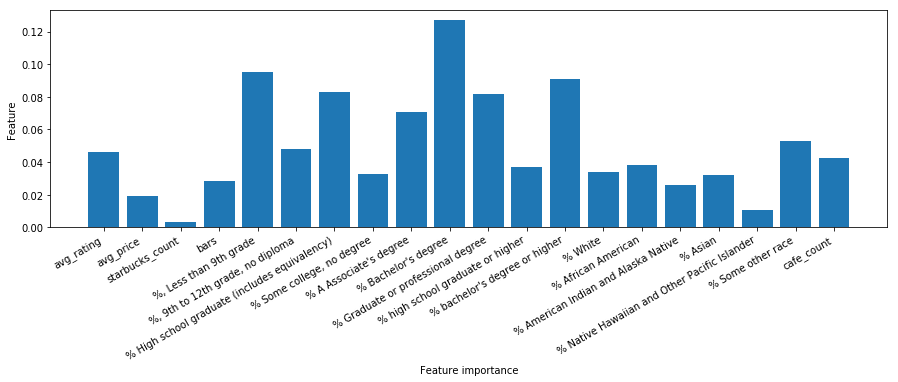

In [416]:
%matplotlib inline
forest= RandomForestClassifier(n_estimators= 40, max_depth= 5)
forest.fit(data_train, target_train)
feature_importances = forest.feature_importances_
feature_importance_list = [round(value, 4) for value in feature_importances]

def plot_feature_importances(model, data):
    n_features = data.shape[1]
    plt.figure(figsize=(15,4))
#     labels = [ '\n'.join(wrap(l, 35)) for l in data.columns] 
    plt.bar(range(n_features)[:60], model.feature_importances_[:60], align='center') 
    plt.xticks(np.arange(n_features)[:60], data.columns, rotation = 30, ha = 'right') 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(forest, X)

print('Train Set Score: {:0.2f}%'.format(forest.score(data_train,target_train) * 100))
print('test set score: {:0.2f}%'.format(forest.score(data_test, target_test)*100))


feature_importance = dict(zip(X.columns, feature_importance_list))
print('\n', 'Top 10 Features:')
sorted_dict = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
for item in sorted_dict[:10]:
    print(item)
kfold_scores_forest = cross_val_score(forest, X_resampled, y_resampled, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (kfold_scores_forest.mean()*100, kfold_scores_forest.std() * 2*100))

In [716]:
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# # Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# Binarize the output
y = label_binarize(y_resampled, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(X_resampled, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators= 40, max_depth= 5))
y_score = classifier.fit(X_train_roc, y_train_roc).predict_proba(X_test_roc)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(list(y_test_roc[:, i]), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

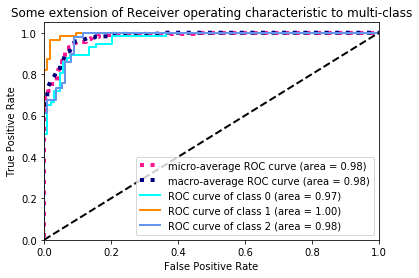

In [717]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

#### Gradient Boost

Train Set Score: 100.00%
test set score: 79.01%

 Top 10 Features:
("% Bachelor's degree", 0.2502)
('%, Less than 9th grade', 0.2375)
('% High school graduate (includes equivalency)', 0.1459)
("% A Associate's degree", 0.0994)
('% Asian', 0.0538)
('% high school graduate or higher', 0.0436)
('avg_price', 0.0405)
('cafe_count', 0.0304)
('% African American', 0.0205)
('% Native Hawaiian and Other Pacific Islander', 0.0142)
Accuracy: 82.66 (+/- 9.31)


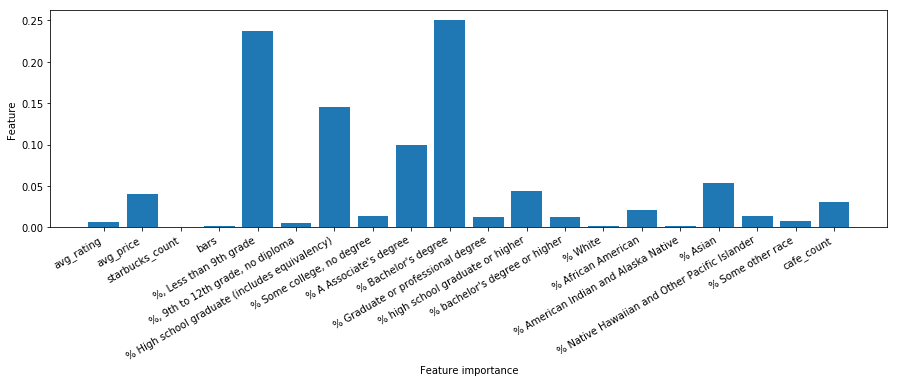

In [417]:
%matplotlib inline
gradboost = GradientBoostingClassifier(random_state = 123, max_depth = 5, learning_rate = 0.01, n_estimators = 100)
gradboost.fit(data_train, target_train)
print('Train Set Score: {:0.2f}%'.format(gradboost.score(data_train, target_train) * 100))
print('test set score: {:0.2f}%'.format(gradboost.score(data_test, target_test)*100))
plot_feature_importances(gradboost, X)

feature_importances_grad = gradboost.feature_importances_
feature_importance_list_grad = [round(value, 4) for value in feature_importances_grad]
feature_importance_grad = dict(zip(X.columns, feature_importance_list_grad))
print('\n', 'Top 10 Features:')
sorted_dict_grad = sorted(feature_importance_grad.items(), key=lambda x: x[1], reverse=True)
for item in sorted_dict_grad[:10]:
    print(item)
    
kfold_scores_gradient = cross_val_score(gradboost, X_resampled, y_resampled, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (kfold_scores_gradient.mean()*100, kfold_scores_gradient.std() * 2*100))

#### Adaboost 

Train Set Score: 87.50%
test set score: 85.19%

 Top 10 Features:
('% Asian', 0.163)
('avg_rating', 0.101)
('% High school graduate (includes equivalency)', 0.078)
('cafe_count', 0.067)
('%, Less than 9th grade', 0.058)
('%, 9th to 12th grade, no diploma', 0.053)
('% African American', 0.047)
('% Some other race', 0.047)
('bars', 0.046)
('avg_price', 0.043)
Accuracy: 78.85 (+/- 16.16)


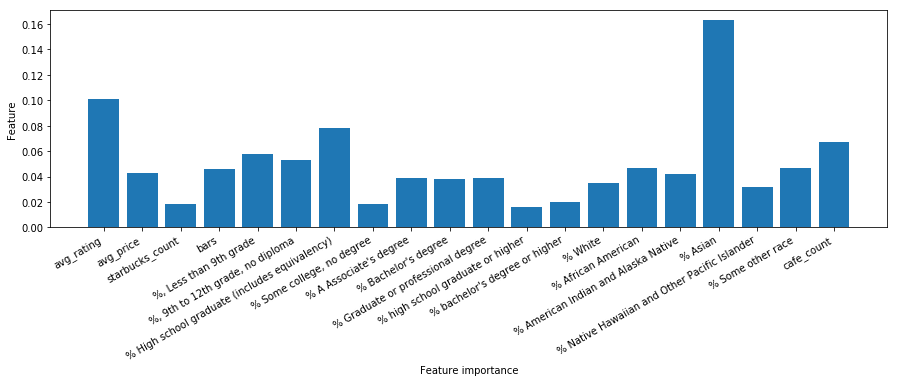

In [418]:
%matplotlib inline
adaboost = AdaBoostClassifier(n_estimators=1000)
adaboost.fit(data_train, target_train)
print('Train Set Score: {:0.2f}%'.format(adaboost.score(data_train, target_train) * 100))
print('test set score: {:0.2f}%'.format(adaboost.score(data_test, target_test)*100))
plot_feature_importances(adaboost, X)


feature_importances_ada = adaboost.feature_importances_
feature_importance_list_ada = [round(value, 4) for value in feature_importances_ada]
feature_importance_ada = dict(zip(X.columns, feature_importance_list_ada))
print('\n', 'Top 10 Features:')
sorted_dict_ada = sorted(feature_importance_ada.items(), key=lambda x: x[1], reverse=True)
for item in sorted_dict_ada[:10]:
    print(item)
    
kfold_scores_ada = cross_val_score(adaboost, X_resampled, y_resampled, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (kfold_scores_ada.mean()*100, kfold_scores_ada.std() * 2*100))

#### Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear', C=10)
clf.fit(data_train, target_train) 
print('Train Set Score: {:0.2f}%'.format(clf.score(data_train, target_train) * 100))
print('test set score: {:0.2f}%'.format(clf.score(data_test, target_test)*100))

In [ ]:
# Grid Search
svm_grid = {
    'C': [100, 10000, 100000, 1000000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
svm_grid_search = GridSearchCV(svm.SVC(), svm_grid, return_train_score=True)
svm_grid_search.fit(data_train, target_train)

svm_gs_training_score = np.mean(svm_grid_search.cv_results_['mean_train_score'])
svm_gs_testing_score = svm_grid_search.score(scaled_df, target)

print("Mean Training Score: {:.4}%".format(svm_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(svm_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
svm_grid_search.best_params_

In [ ]:
clf_best = svm.SVC(kernel='sigmoid', C=10000)
clf_best.fit(data_train, target_train) 

scores_svm = cross_val_score(clf, X, target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svm.mean()*100, scores_svm.std() * 200))

Random Forest Regressor

In [419]:
from sklearn.tree import DecisionTreeRegressor